# Insurance Claims- Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Dataset Attributes

Dataset has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. Target variable: Insurance claim is fraudulent or not

# EDA of Dataset

In [3]:
df.shape

(1000, 40)

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

String, Int & float type data is present in the dataset respectively.

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
#sorting data
df.apply(lambda x: len(x.unique()))

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

_c39 has no significant impact on dataset for result prediction, so we can drop this column

In [7]:
df.drop(['_c39'], axis = 1, inplace = True)

In [8]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


# Separating Categorical and Continuous data

In [9]:
s = (df.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [10]:
s = (df.dtypes == 'int64')
cont_cols = list(s[s].index)

print("Continuous variables:")
print(cont_cols)

Continuous variables:
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [11]:
cont_cols.append('policy_annual_premium')

In [12]:
df[cate_cols].head(10)

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
5,12-10-2006,OH,250/500,FEMALE,PhD,tech-support,bungie-jumping,unmarried,02-01-2015,Multi-vehicle Collision,...,Major Damage,Fire,SC,Arlington,8973 Washington St,NO,NO,Saab,95,Y
6,04-06-2000,IN,250/500,MALE,PhD,prof-specialty,board-games,husband,13-01-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,?,?,Nissan,Pathfinder,N
7,03-02-1990,IL,100/300,MALE,Associate,tech-support,base-jumping,unmarried,27-02-2015,Multi-vehicle Collision,...,Total Loss,Police,VA,Columbus,3525 3rd Hwy,?,YES,Audi,A5,N
8,05-02-1997,IL,100/300,FEMALE,PhD,other-service,golf,own-child,30-01-2015,Single Vehicle Collision,...,Total Loss,Police,WV,Arlington,4872 Rock Ridge,NO,YES,Toyota,Camry,N
9,25-07-2011,IL,100/300,MALE,PhD,priv-house-serv,camping,wife,05-01-2015,Single Vehicle Collision,...,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,NO,?,Saab,92x,N


In [13]:
df[cont_cols].head(10)

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_annual_premium
0,328,48,521585,1000,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1406.91
1,228,42,342868,2000,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,1197.22
2,134,29,687698,2000,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,1413.14
3,256,41,227811,2000,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1415.74
4,228,44,367455,1000,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,1583.91
5,256,39,104594,1000,0,478456,0,0,19,3,0,2,64100,6410,6410,51280,2003,1351.10
6,137,34,413978,1000,0,441716,0,-77000,0,3,0,0,78650,21450,7150,50050,2012,1333.35
7,165,37,429027,1000,0,603195,0,0,23,3,2,2,51590,9380,9380,32830,2015,1137.03
8,27,33,485665,500,0,601734,0,0,21,1,1,1,27700,2770,2770,22160,2012,1442.99
9,212,42,636550,500,0,600983,0,-39300,14,1,2,1,42300,4700,4700,32900,1996,1315.68


In [14]:
#Statitical Summary of Dataset
df[cont_cols].describe()

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_annual_premium
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,1256.406150
std,115.113174,9.140287,257063.005276,611.864673,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,244.167395
min,0.000000,19.000000,100804.000000,500.000000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,433.330000
25%,115.750000,32.000000,335980.250000,500.000000,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,1089.607500
50%,199.500000,38.000000,533135.000000,1000.000000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,1257.200000
75%,276.250000,44.000000,759099.750000,2000.000000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,1415.695000
max,479.000000,64.000000,999435.000000,2000.000000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,2047.590000


Count for all the columns is 1000, hence there are no missing values in these columns.

The mean of months_as_customer is 203.95 and the mode is 199.50. The range is 0 - 479 and IQR is 115.75 - 276.25.

The mean of age is 38.95 and the mode is 38. The range of age is 19 - 64 and IQR is 32 - 44.

The mean of policy_deductable is 1136 and the mode is 1000. The range of policy_deductable is 500 - 2000 and IQR is also 500 - 2000.

Mode of umbrella_limit is 0 and range is -1000000 - 1000000.

The mean of capital-gains is 25126.10 and the mode is 0. The range is 0 - 100500.

The mean of capital-loss is -26793.70 and the mode is -23250.00. The range is -111100.00 - 0.

The mode of incident_hour of the day is 12.

The mean of total_claim_amount is 52761.94 and the mode is 58055.00. The range is 100 - 114920.00 and IQR is 41812.50 - 70592.50.

The mean of injury_claims is 7433.42 and the mode is 6775.00. The range is 0 - 21450 and IQR is 4295.00 - 11305.00.

The mean of property_claim is 7399.57 and the mode is 6750.00. The range is 0 - 23670.00 and IQR is 4445.00 - 10885.00.

The mean of vehicle_claim is 37928.95 and the mode is 42100.00. The range is 70 - 79560.00 and IQR is 30292.50 - 50822.50.

The mode of auto_year is 2005 and the range is 1995 - 2015.

The mean of policy_annual_premium is 1256.41 and the mode is 1257.20. The range is 433.33 - 2047.59 and IQR is 1089.61 - 1415.69

In [15]:
#Checking and treating missing values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

No null values present in the dataset.

<AxesSubplot:>

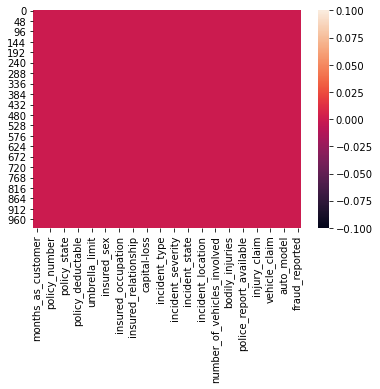

In [16]:
#to check missing values in data set via heat map # Data visualization
sns.heatmap(df.isnull())

Same color plot so no null value in the dataset

# Data Visualization

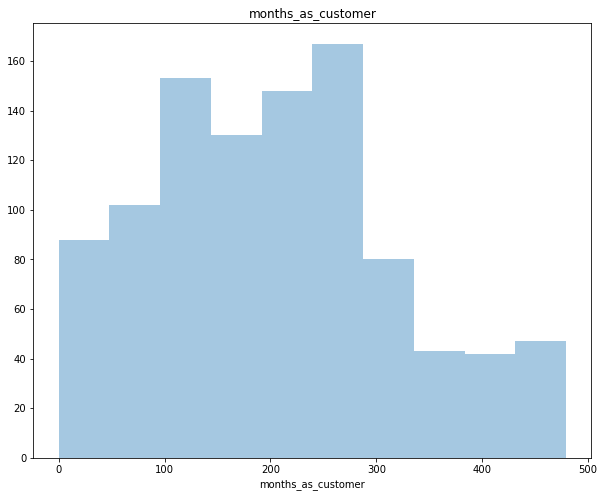

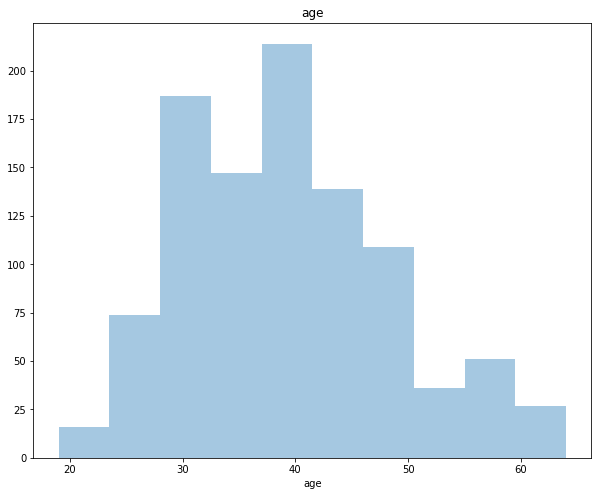

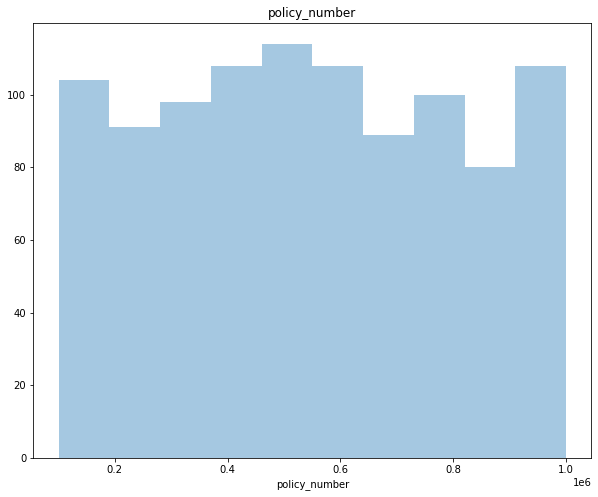

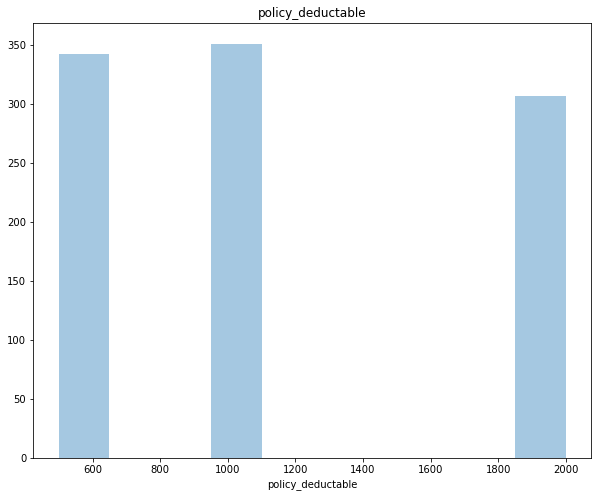

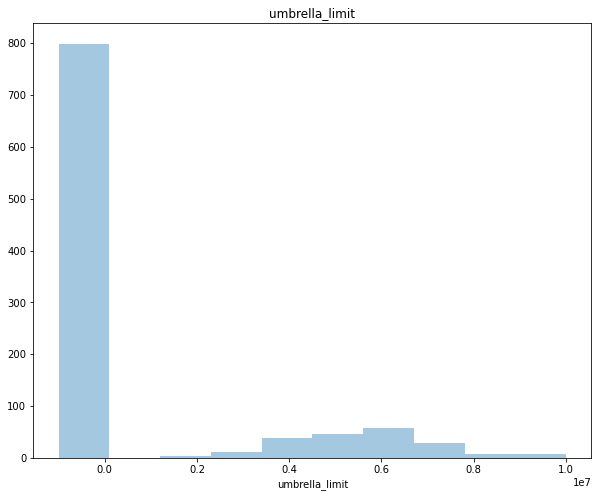

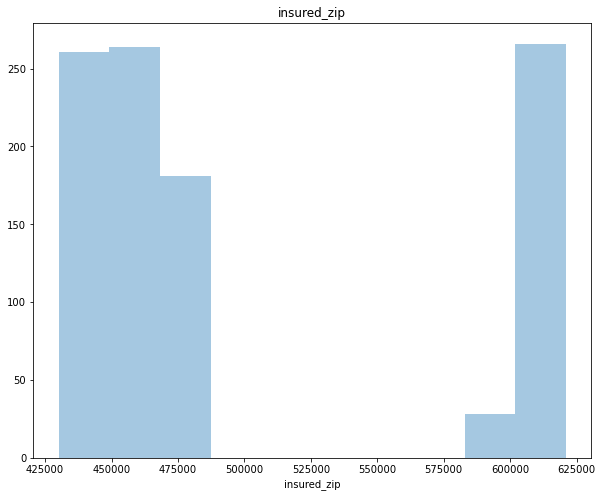

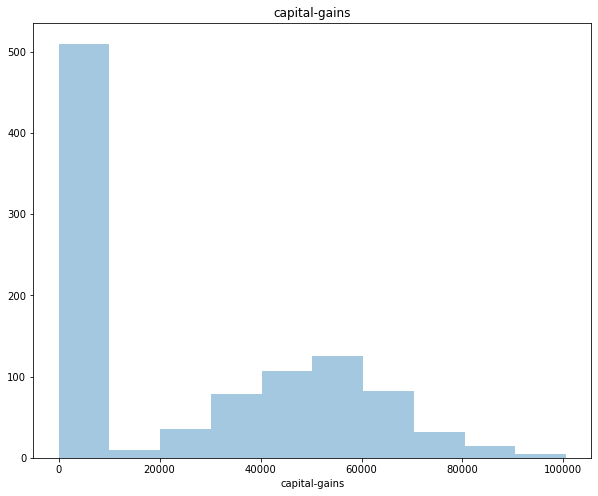

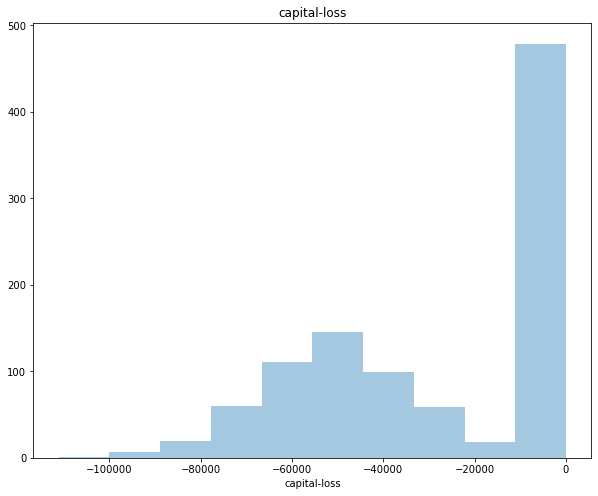

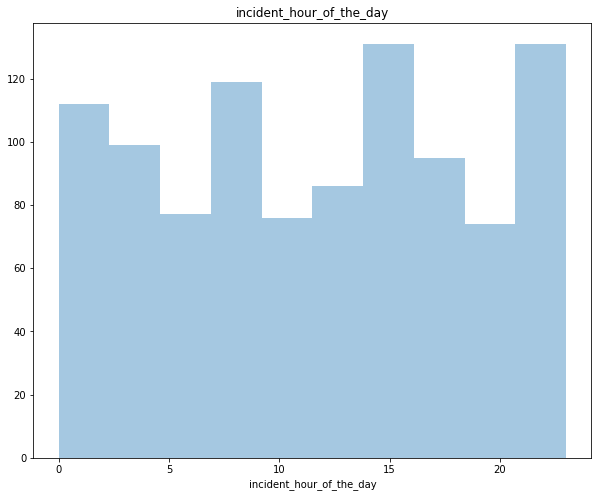

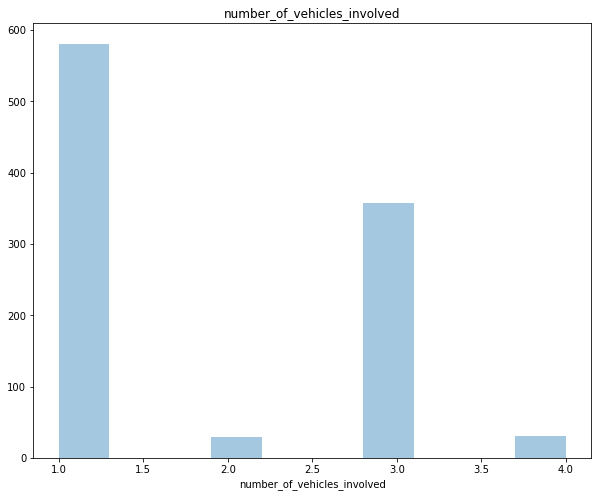

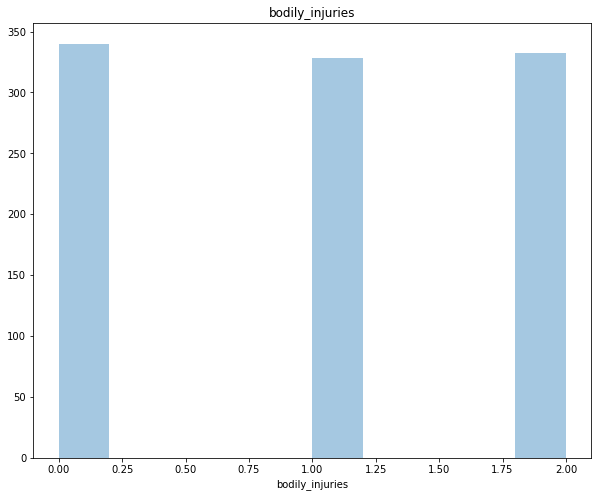

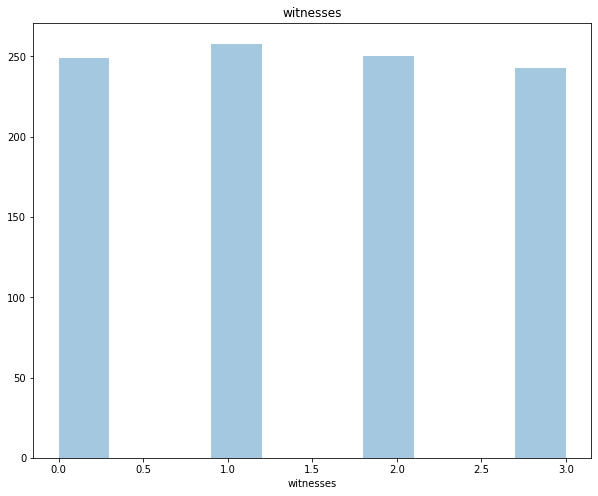

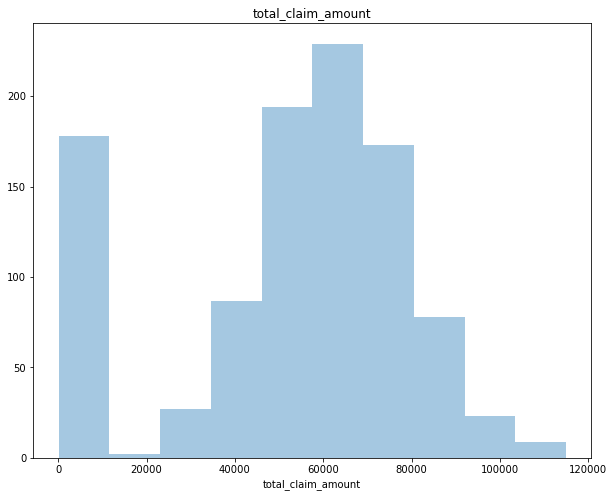

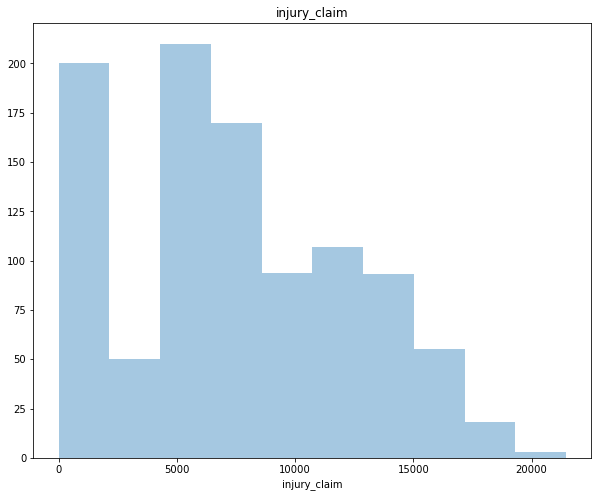

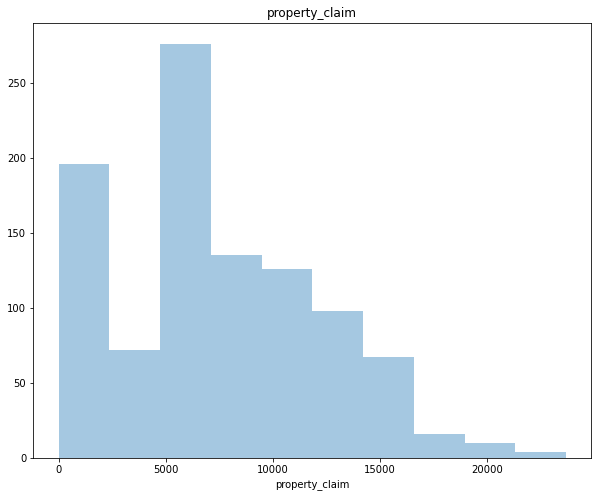

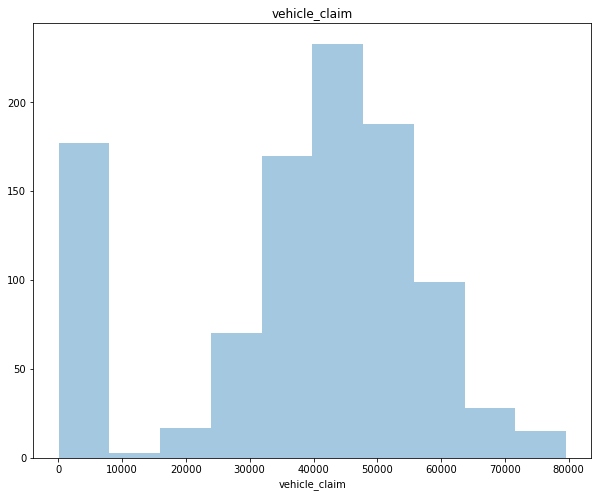

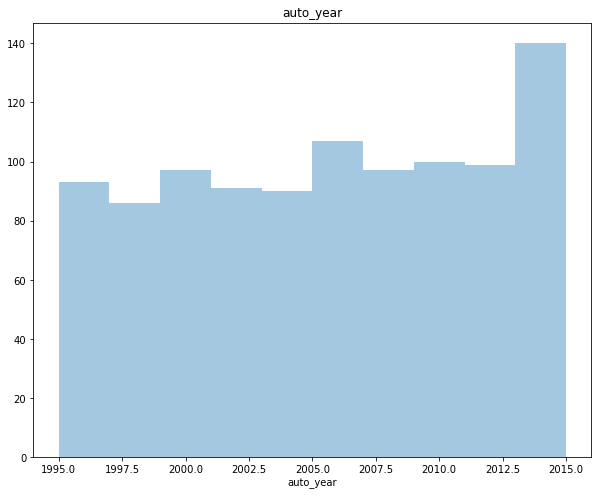

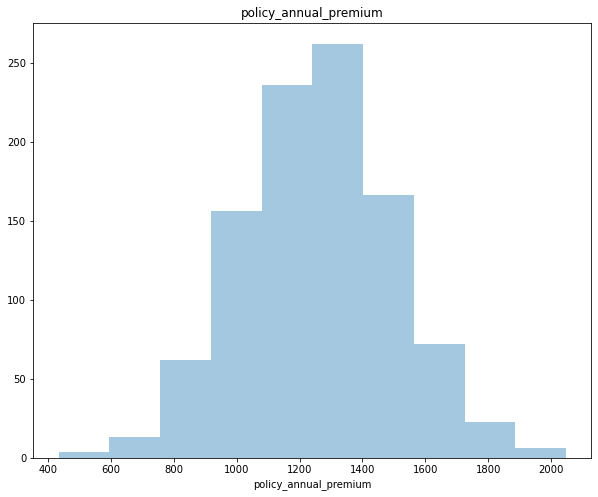

In [18]:
#univariate analysis
for i in df[cont_cols]:                               
    plt.figure(figsize = (10, 8))
    sns.distplot(df[i], bins = 10, kde = False)
    plt.title(i)
    plt.show()

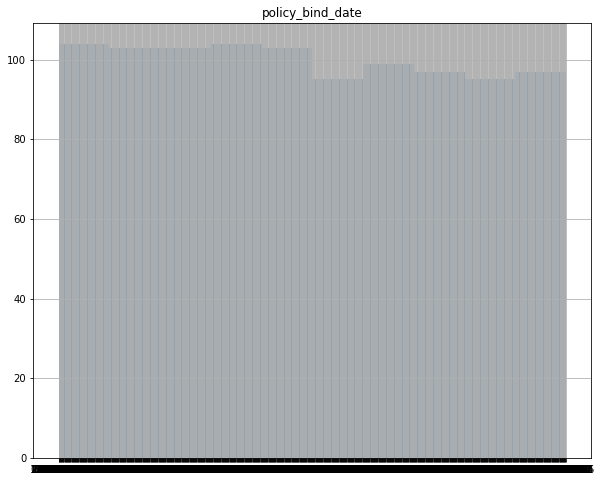

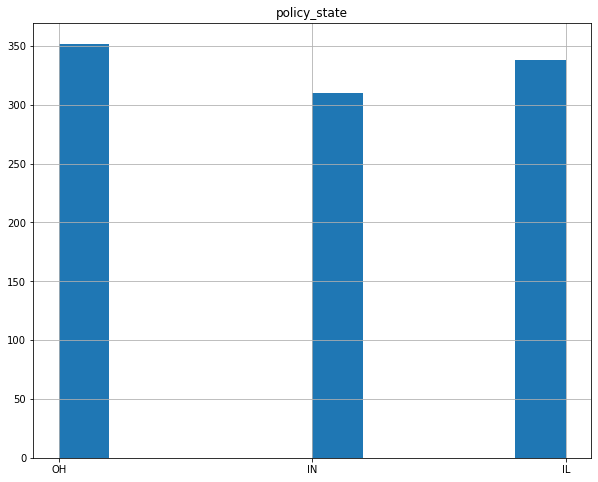

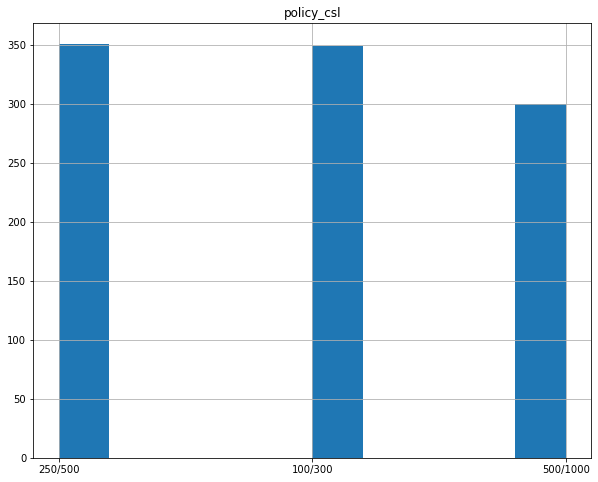

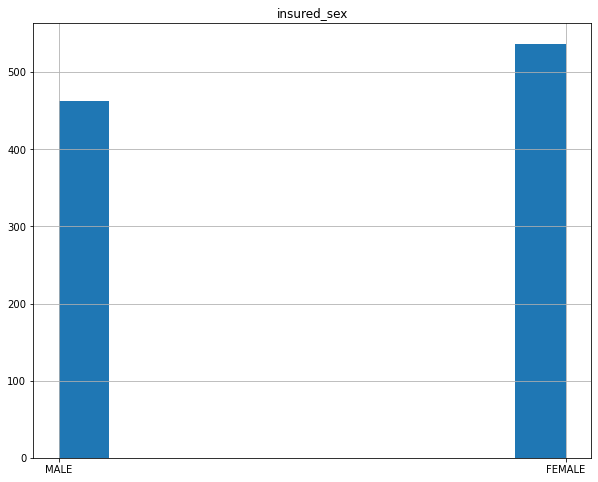

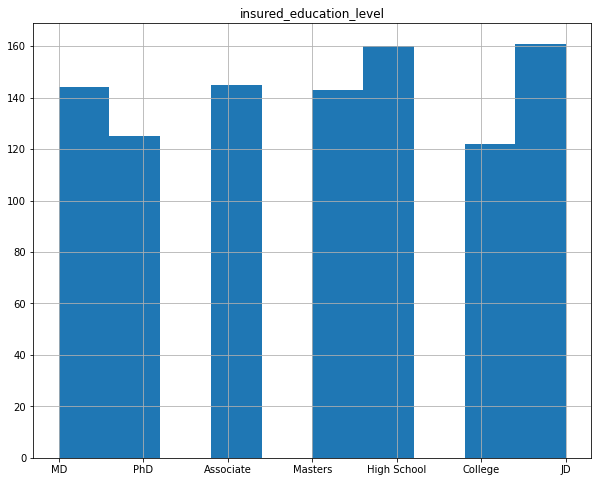

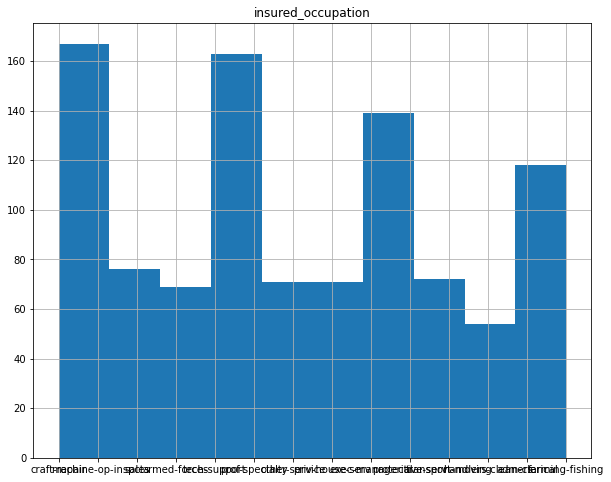

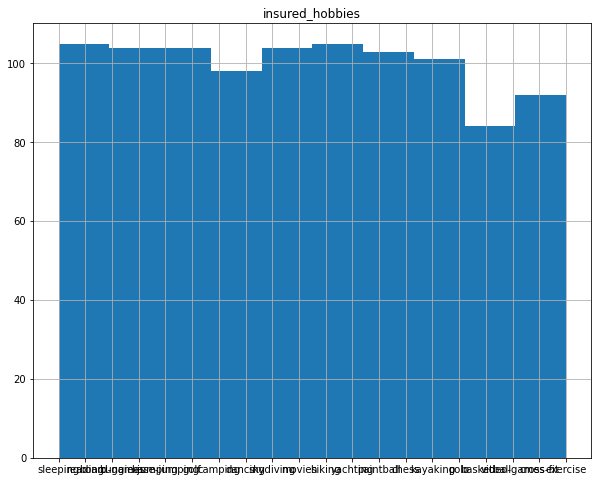

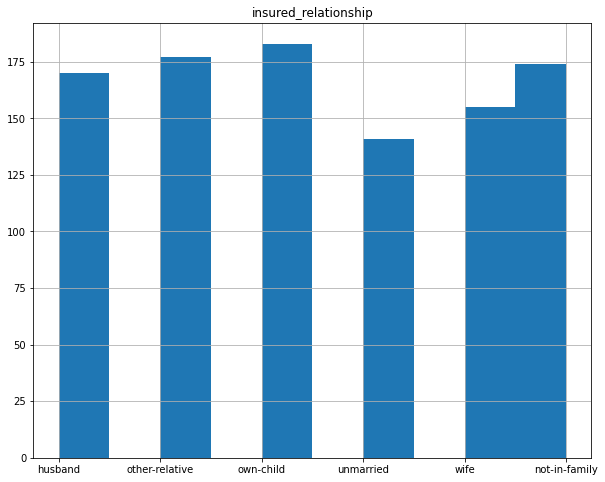

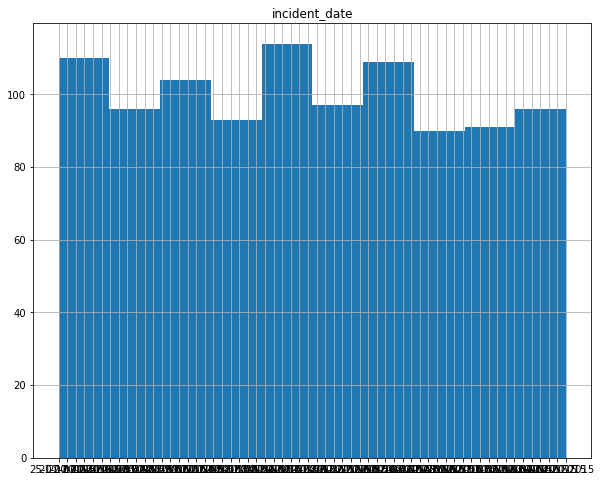

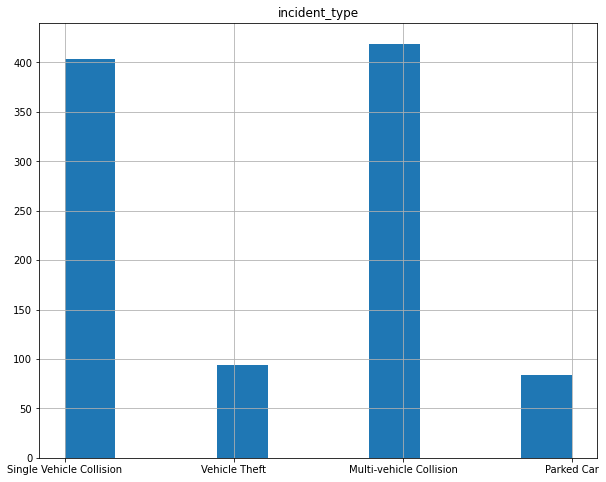

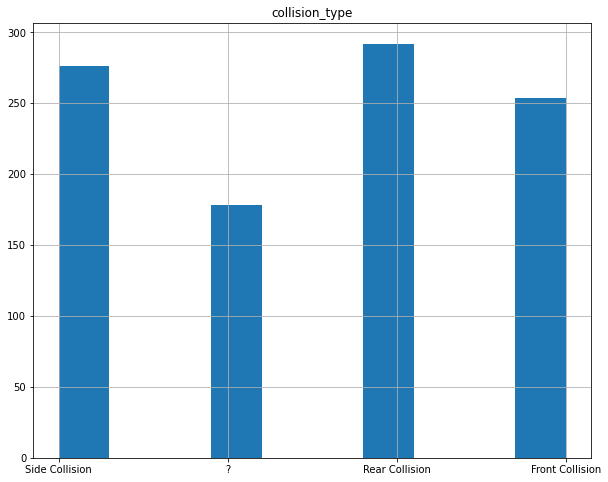

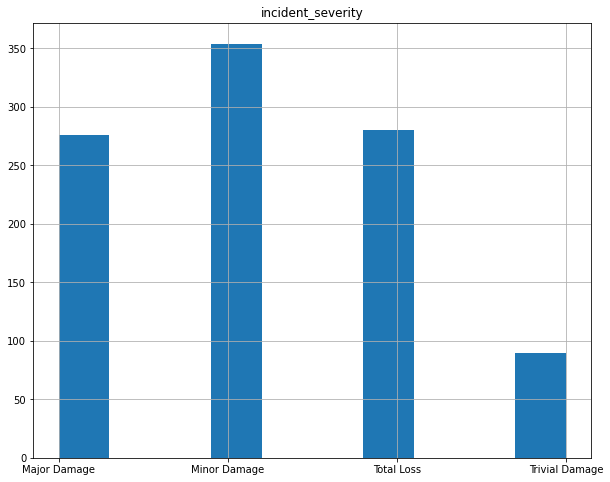

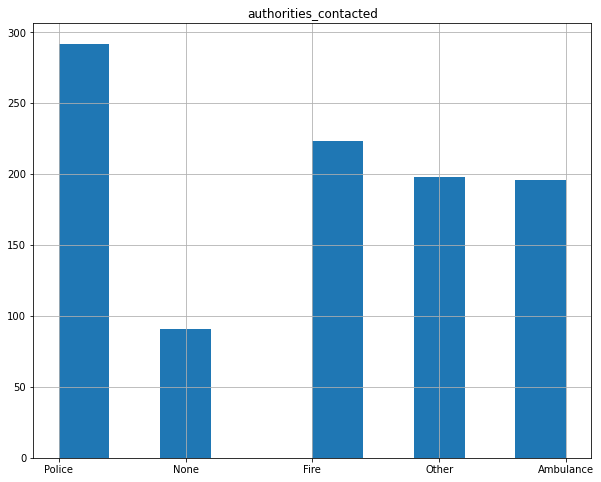

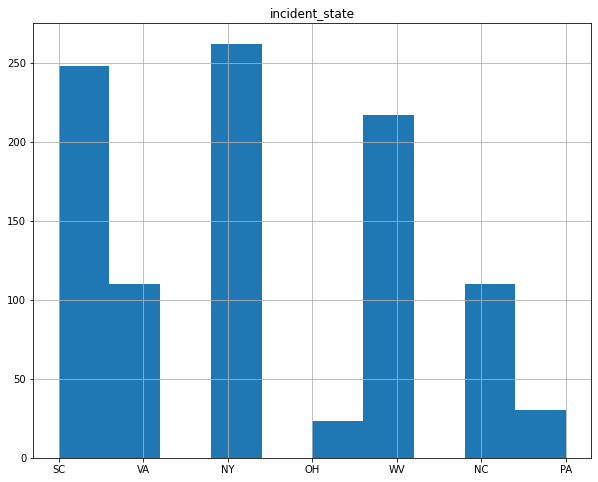

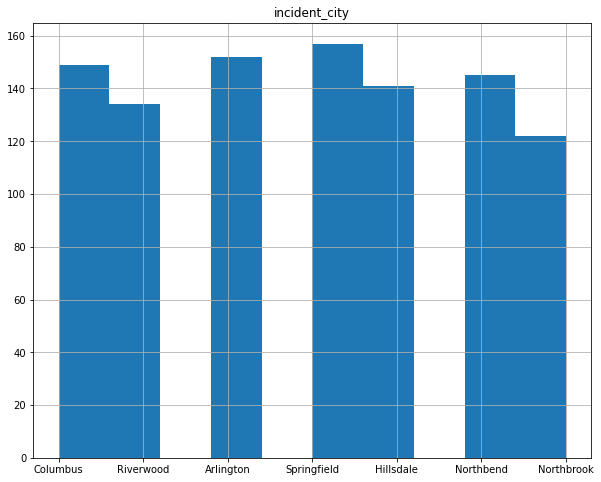

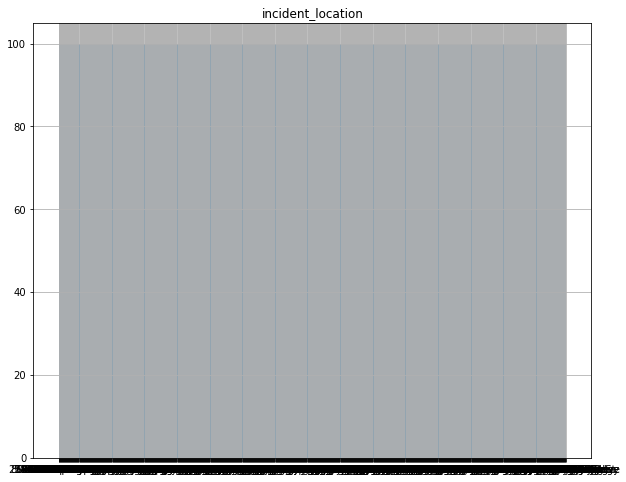

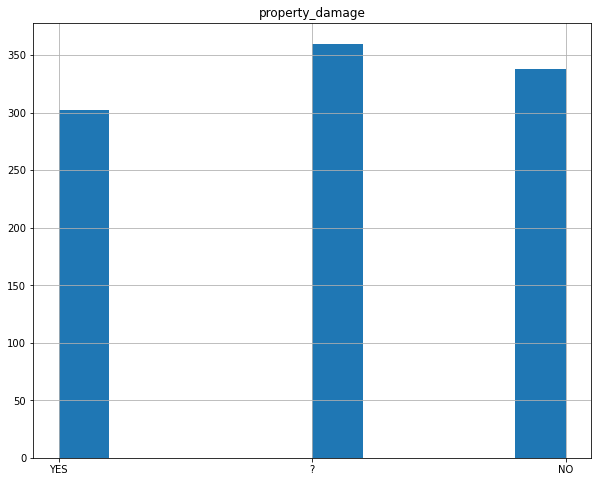

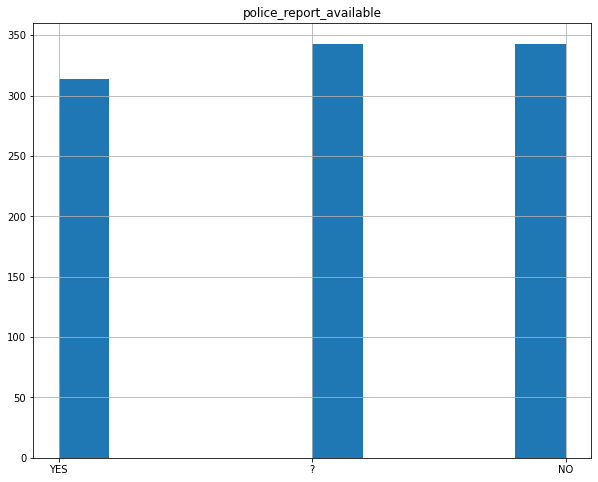

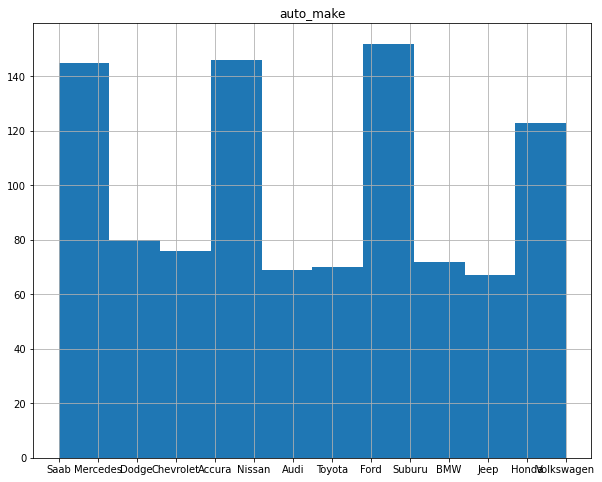

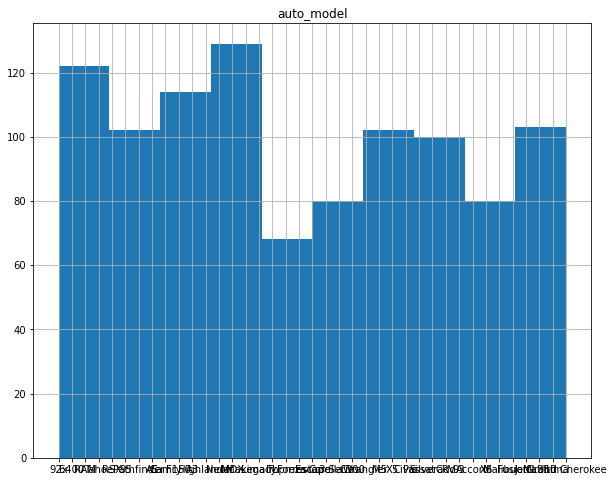

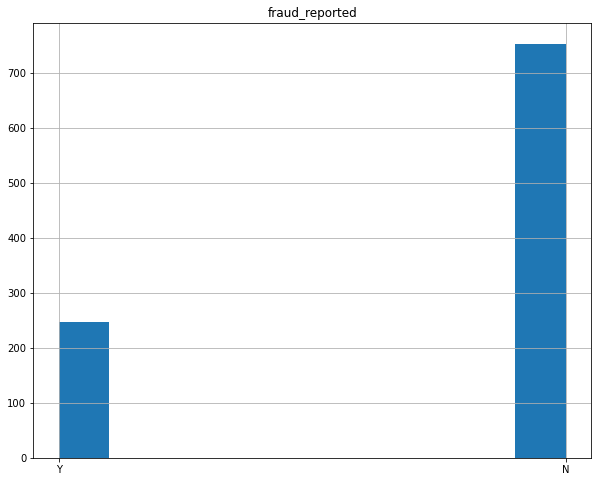

In [21]:
for i in cate_cols:                           
    plt.figure(figsize = (10, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

In [22]:
#Dropping columns having not much information
df.drop(['policy_bind_date', 'incident_date', 'incident_location'], axis = 1, inplace = True)

In [23]:
cate_cols.remove('policy_bind_date')
cate_cols.remove('incident_date')
cate_cols.remove('incident_location')

In [24]:
df[cate_cols].head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N


In [25]:
df['collision_type'].replace('?', 'Unknown', inplace = True)
df['property_damage'].replace('?', 'Unknown', inplace = True)
df['police_report_available'].replace('?', 'Unknown', inplace = True)

Text(0.5, 1.0, 'Fraud reported  Percentage')

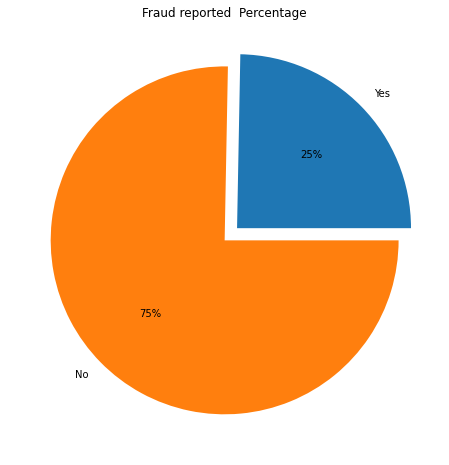

In [26]:
vals = [df.fraud_reported[df.fraud_reported == 'Y'].count() , df.fraud_reported[df.fraud_reported == 'N'].count()]
plt.figure(figsize = (15, 8))
label = ["Yes" , "No"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0.1 , 0))
plt.title("Fraud reported  Percentage")

Only 25% of the claims are fraud while 75% are not fraud

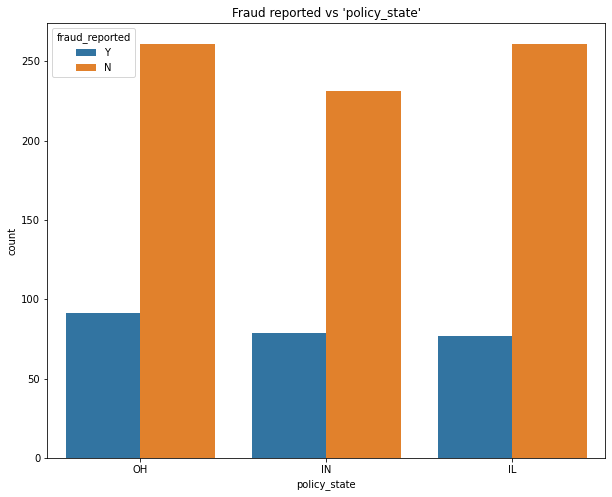

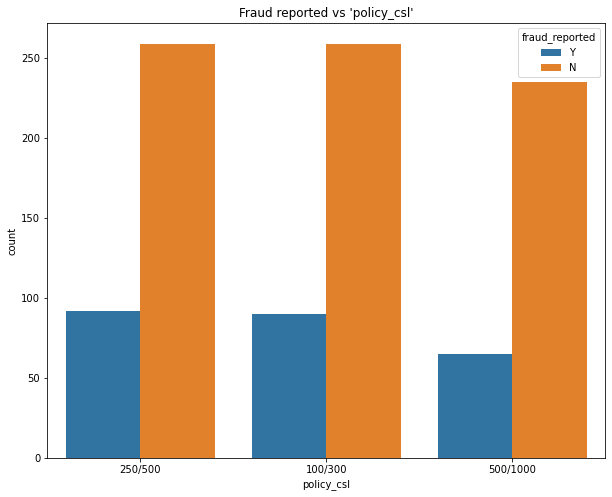

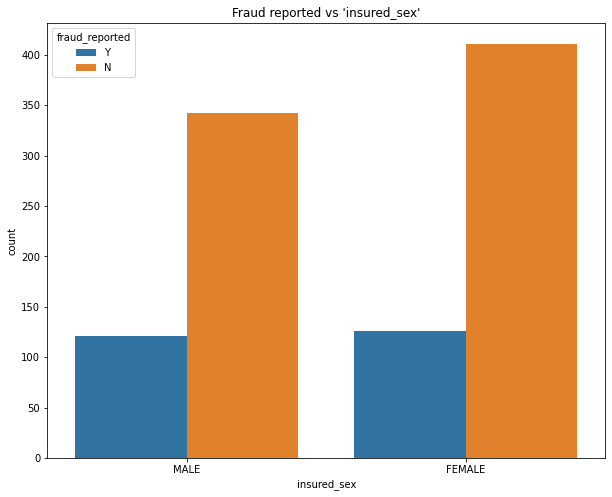

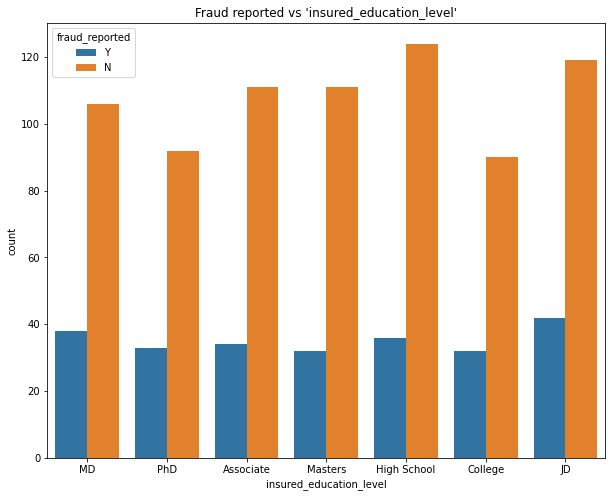

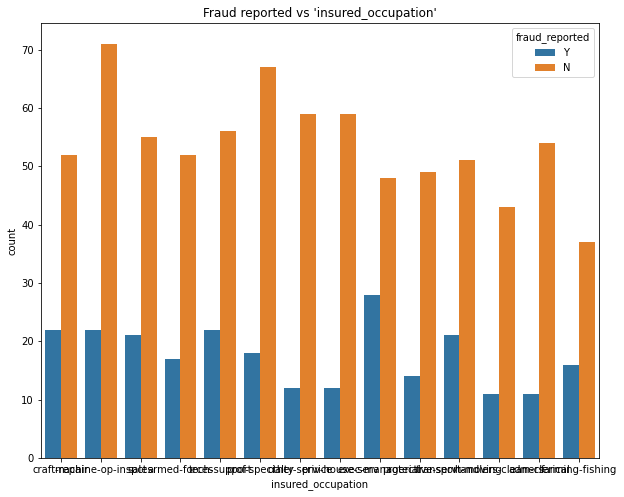

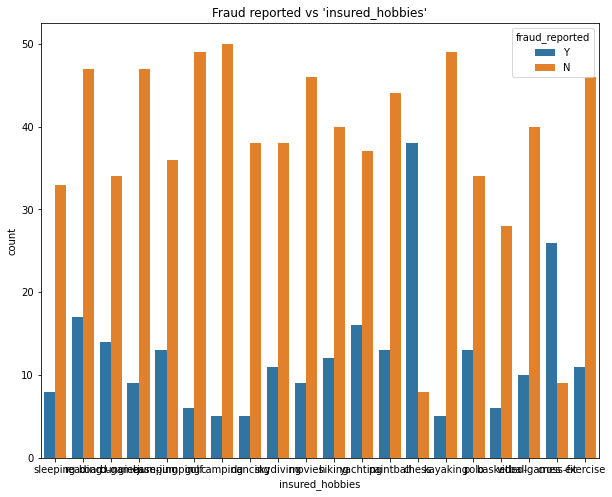

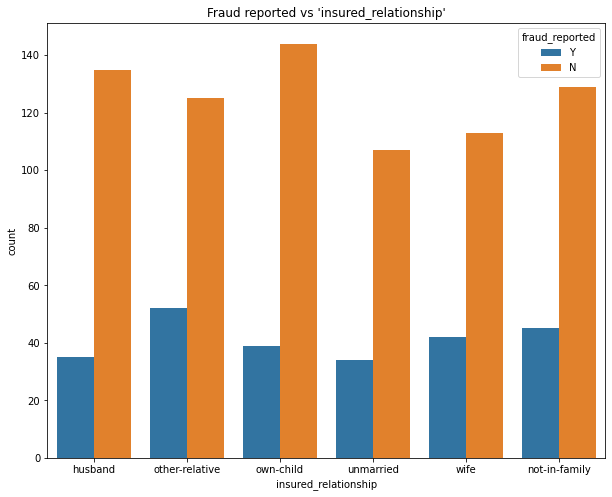

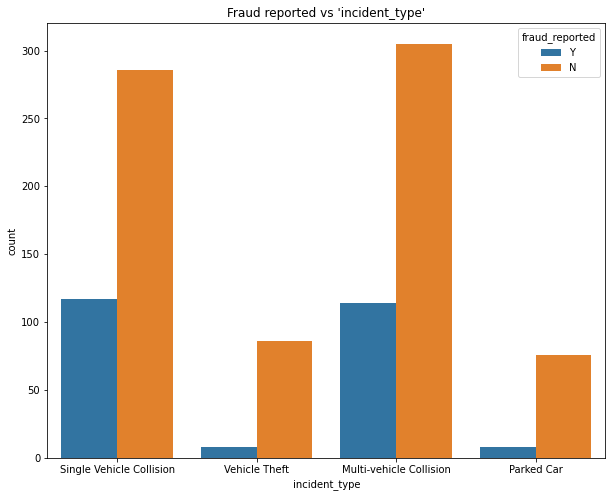

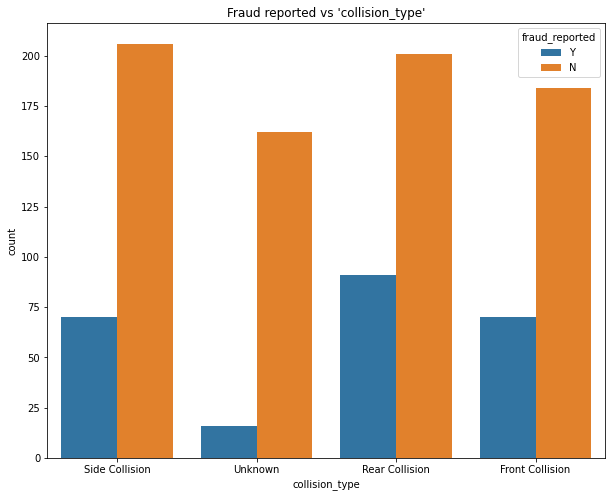

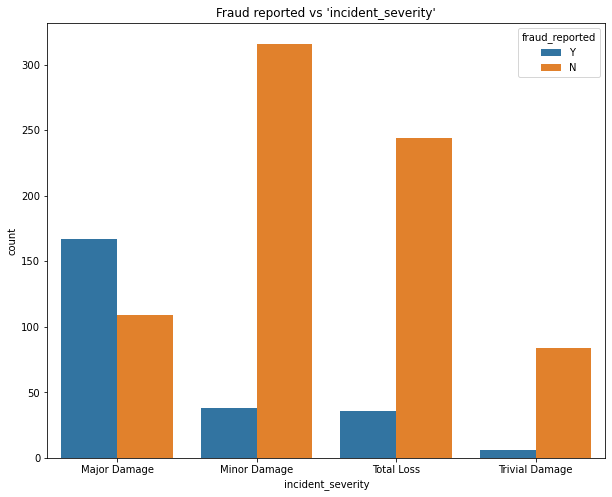

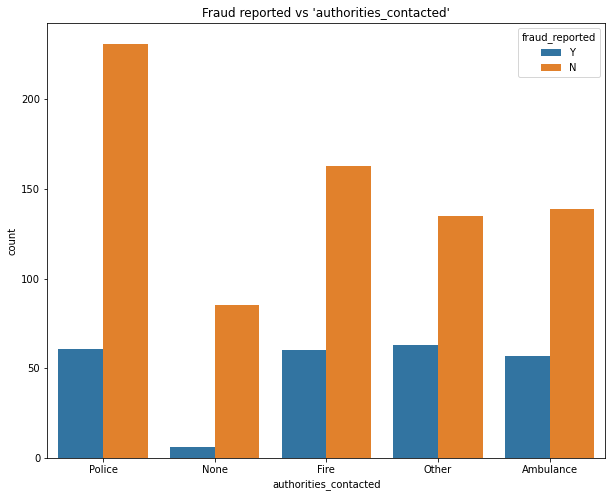

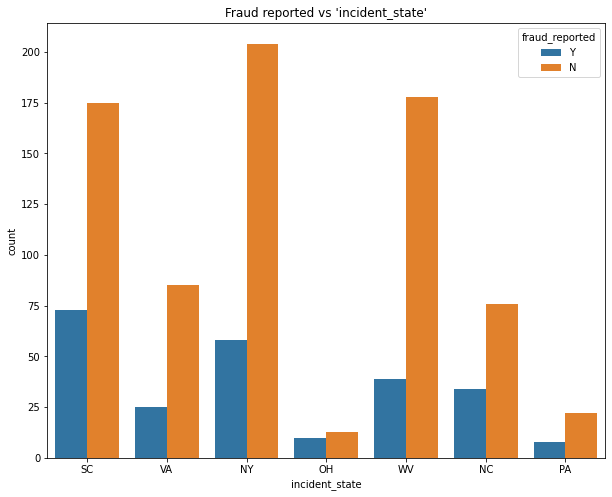

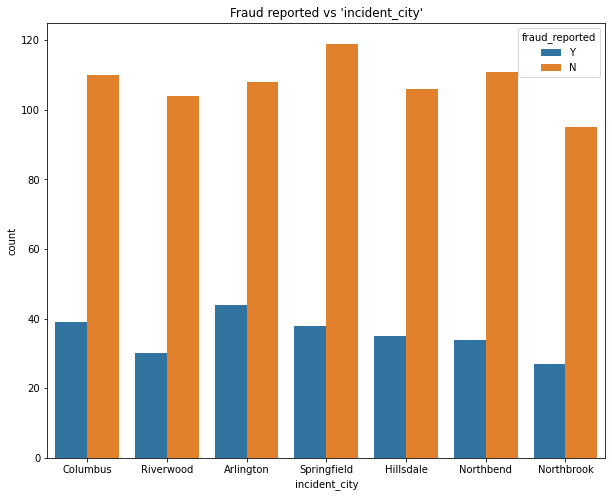

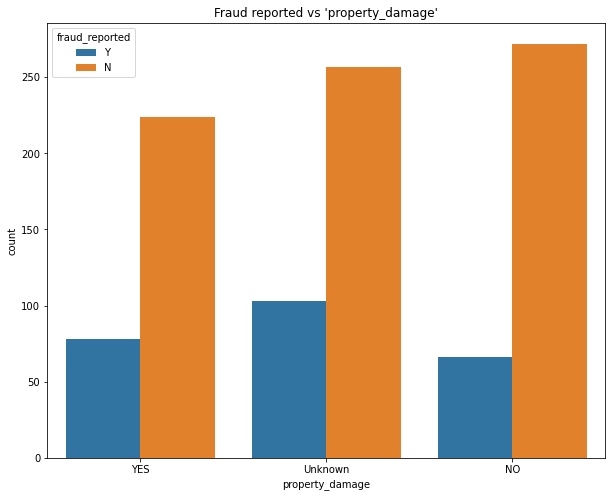

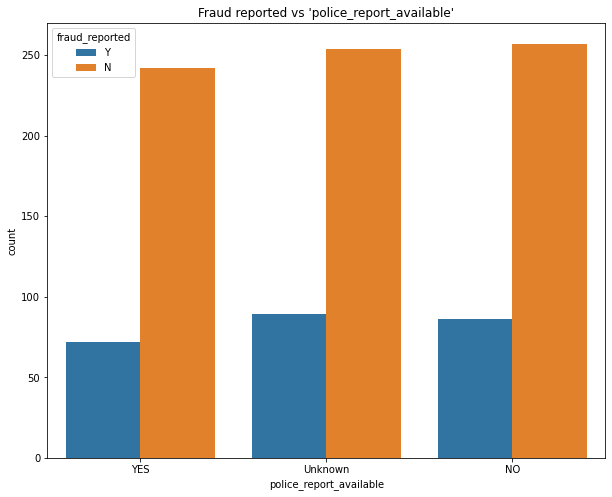

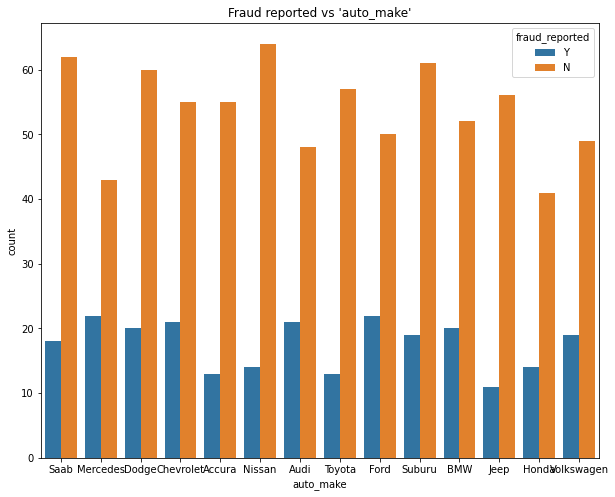

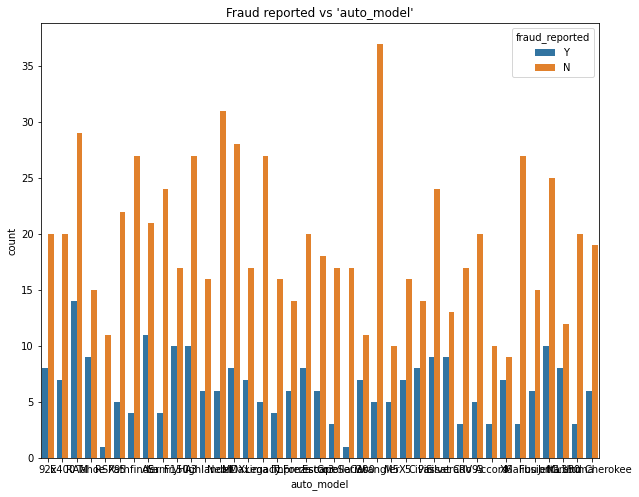

In [27]:
#bivariate analysis
for i in cate_cols[:-1]:                              
    plt.figure(figsize=(10, 8))
    plt.title("Fraud reported vs '%s'"%i)
    sns.countplot(df[i],hue=df['fraud_reported'])

In incident severity we can see that fraud is reported in alot of major damage cases. Apart from that other columns and bars have low fraud reported rate.

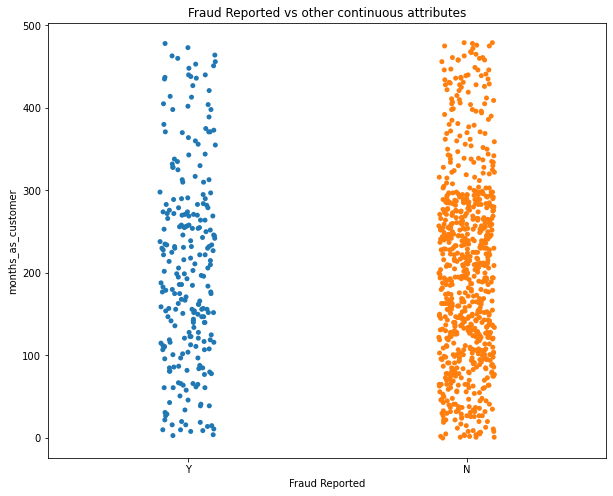

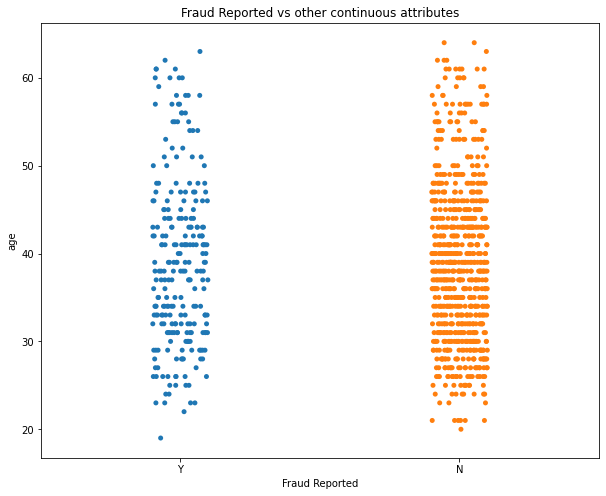

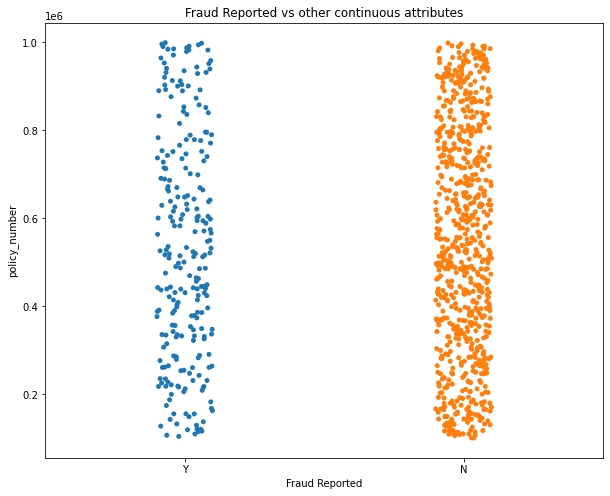

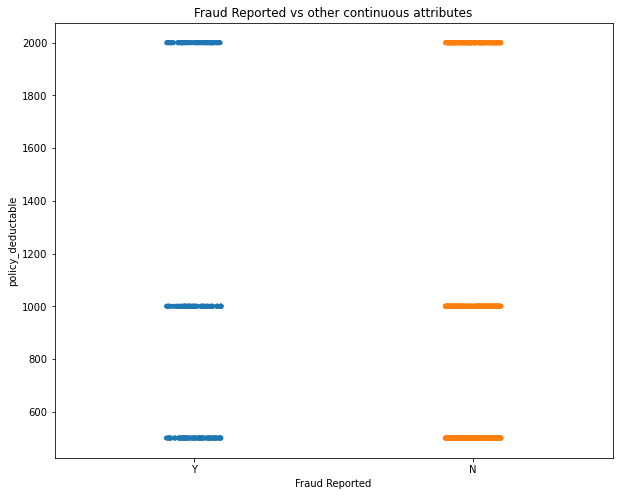

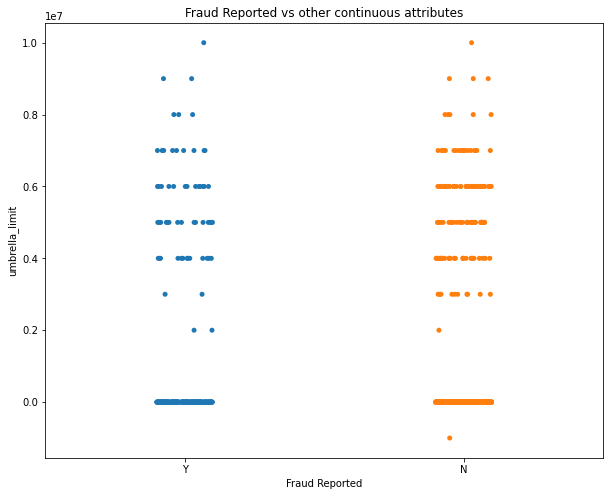

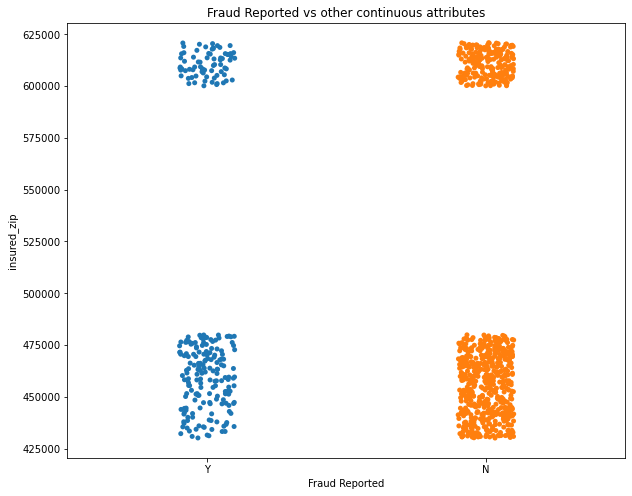

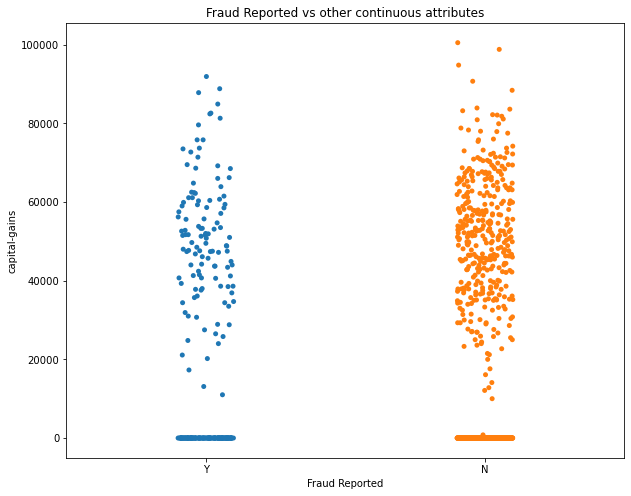

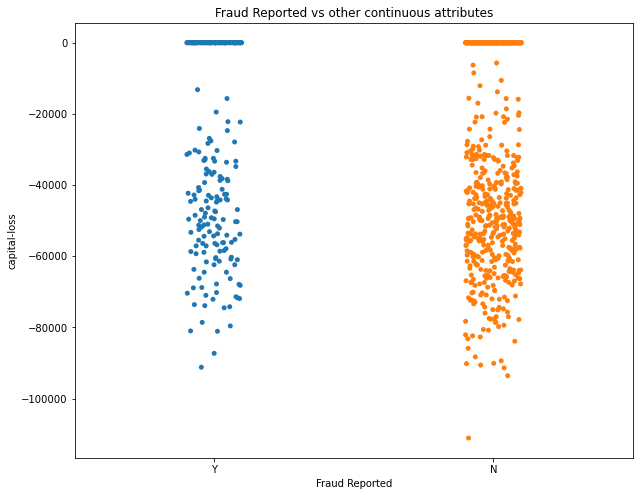

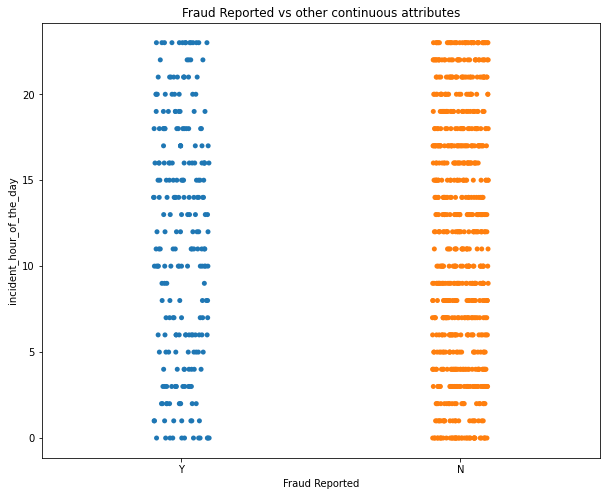

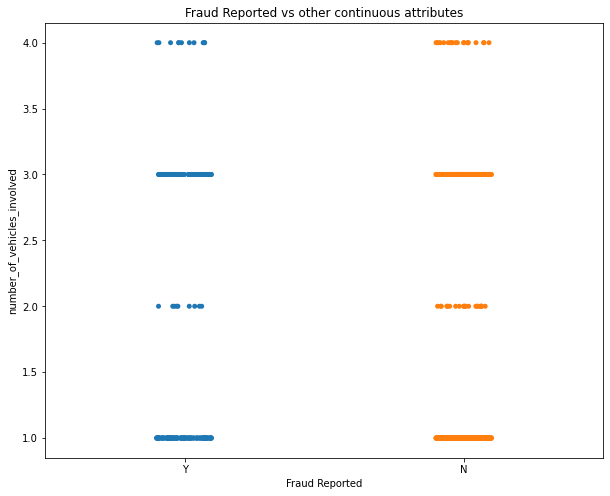

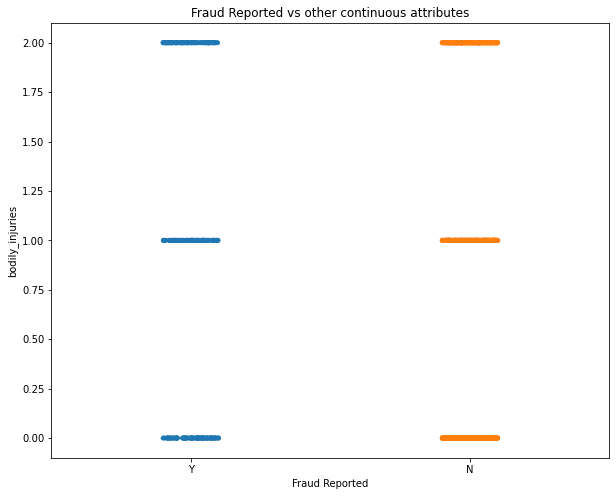

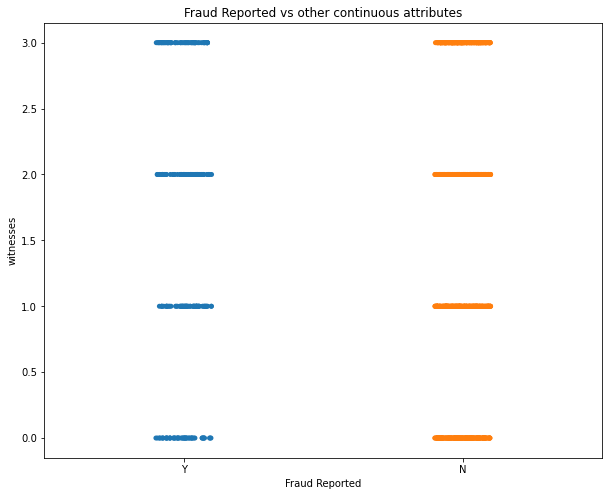

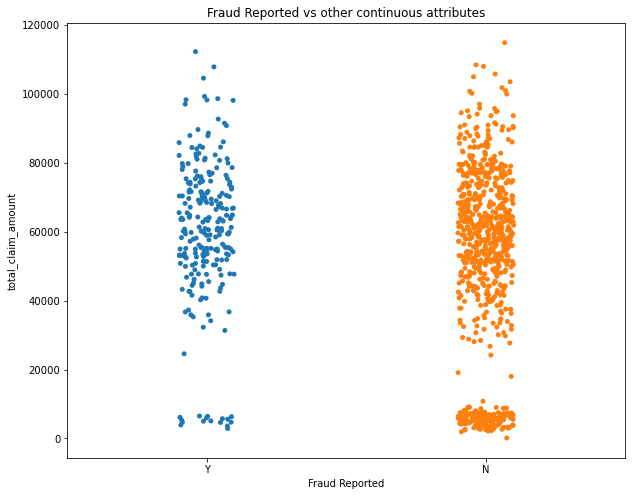

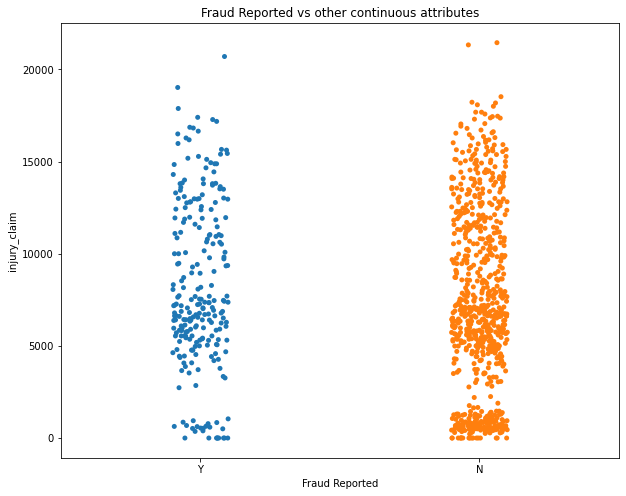

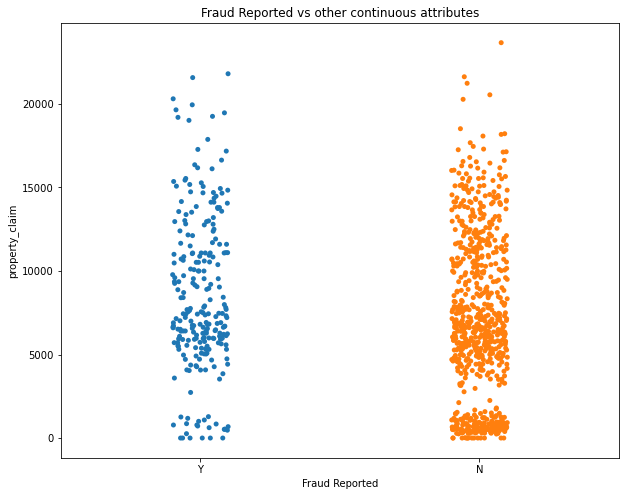

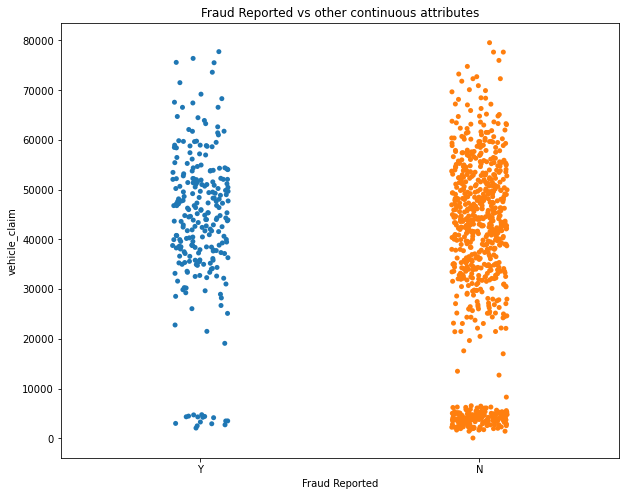

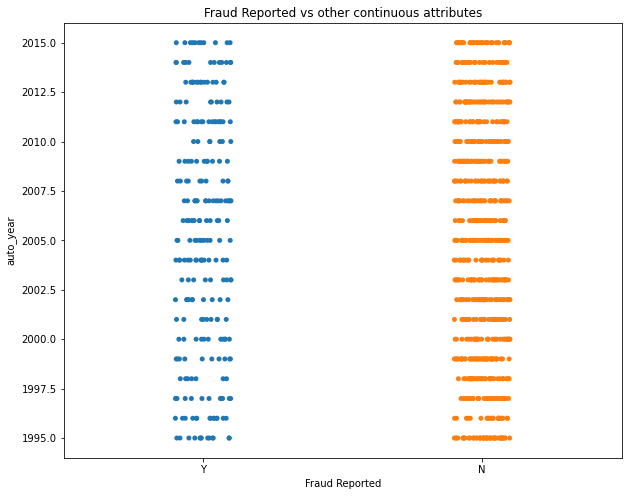

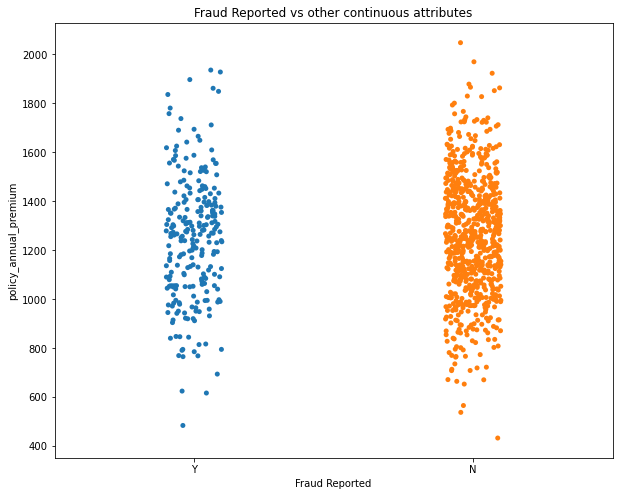

In [29]:
for i in cont_cols:                                          
    plt.figure(figsize = (10, 8))
    ax = sns.stripplot(df['fraud_reported'], df[i])
    ax.set(xlabel = 'Fraud Reported', ylabel = i)
    plt.title('Fraud Reported vs other continuous attributes')
    plt.show()

In [30]:
df['fraud_reported'].replace('N', 0, inplace = True)
df['fraud_reported'].replace('Y', 1, inplace = True)

# To check correlation

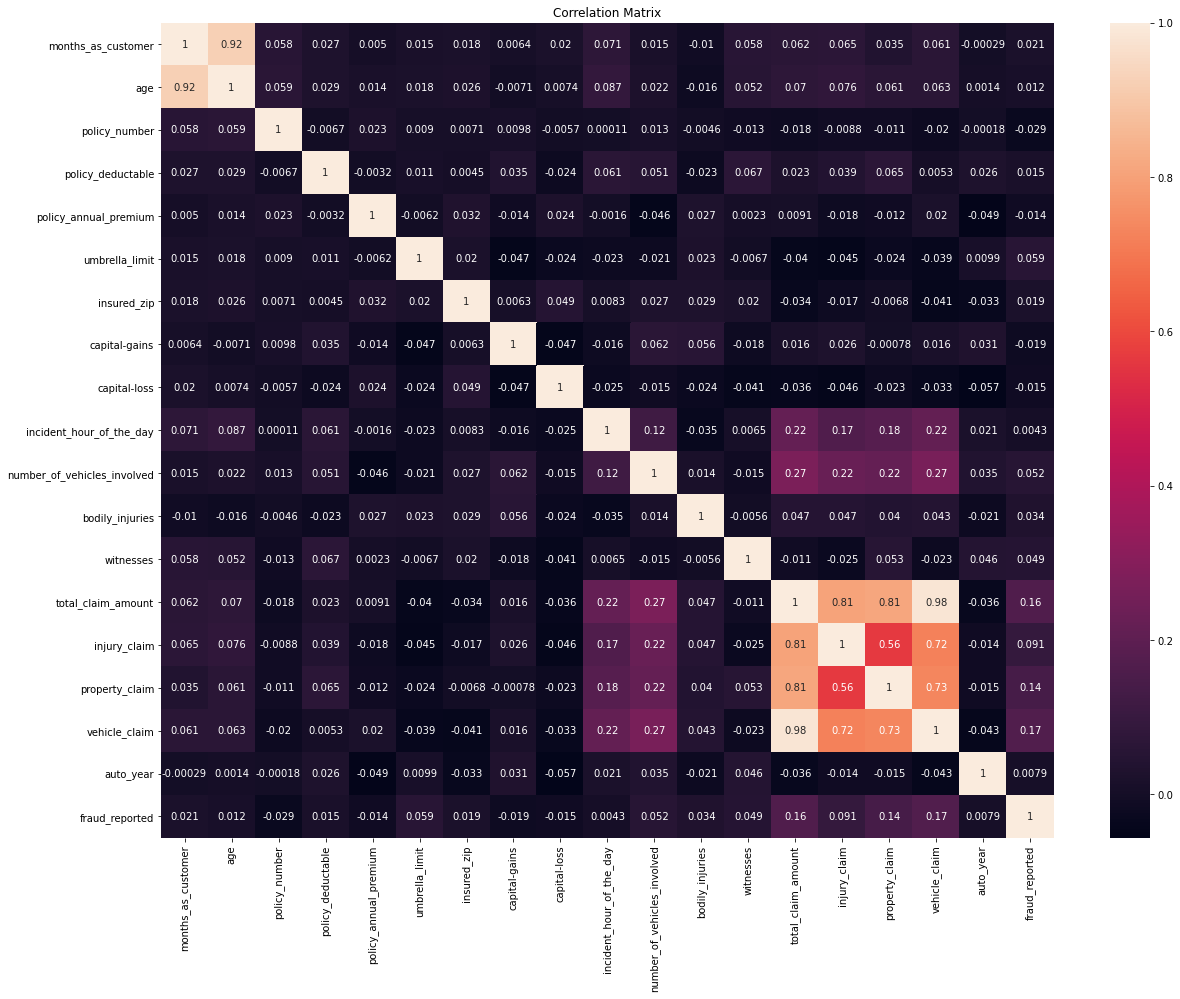

In [31]:
plt.figure(figsize = [20, 15])                             
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

month_as_customer & age are highly correlated

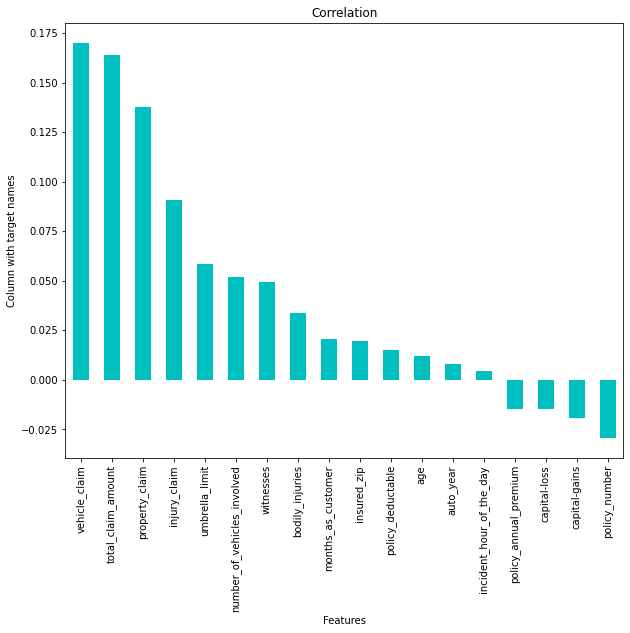

In [32]:
plt.figure(figsize = (10, 8))
df.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

Fraud reported is highly correlated with vehicle_claim then total_claim_amount and then property_claim

# To check Outliers & Skewness

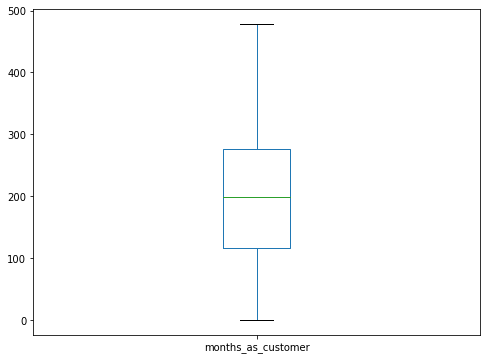

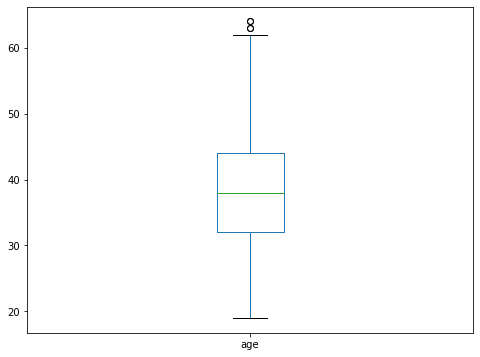

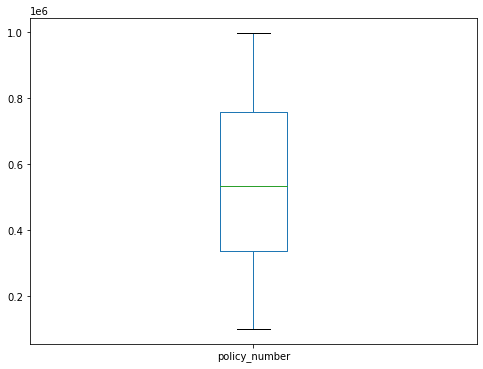

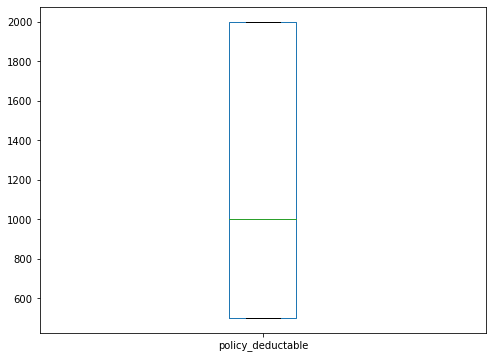

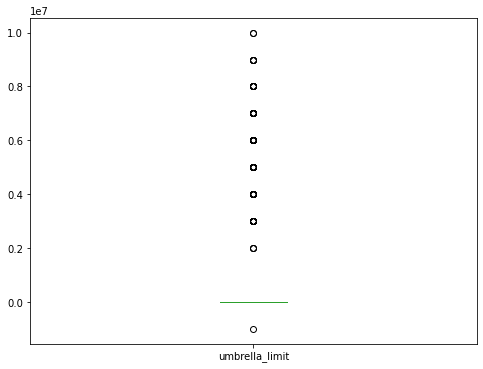

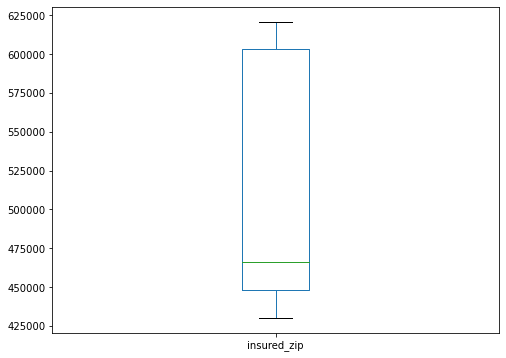

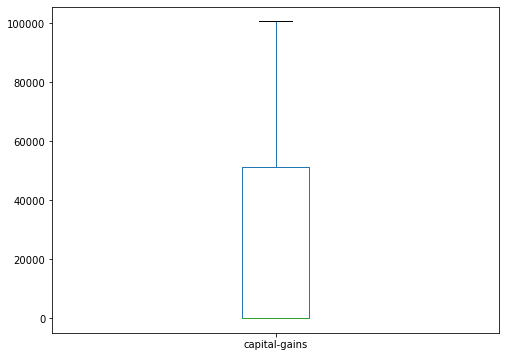

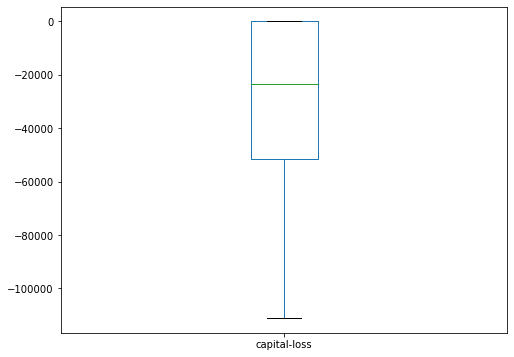

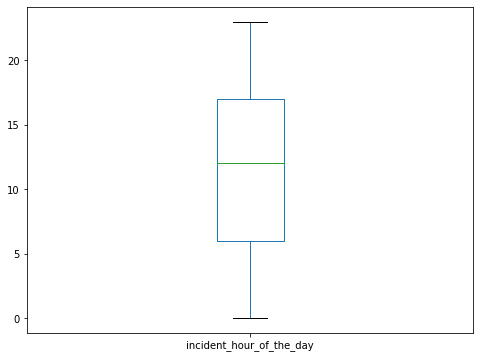

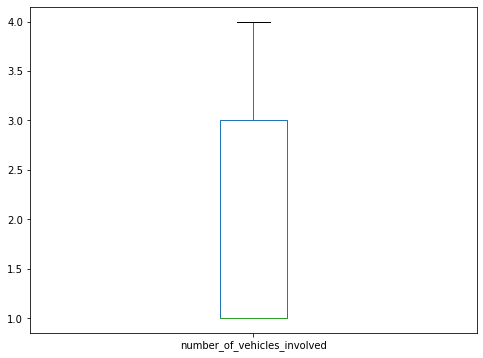

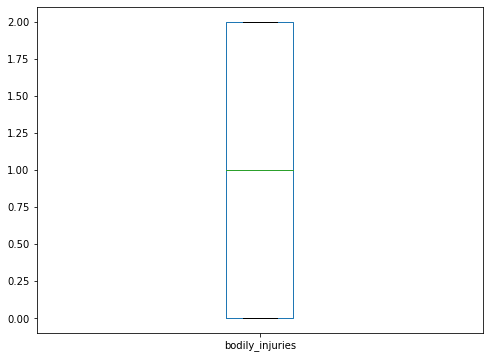

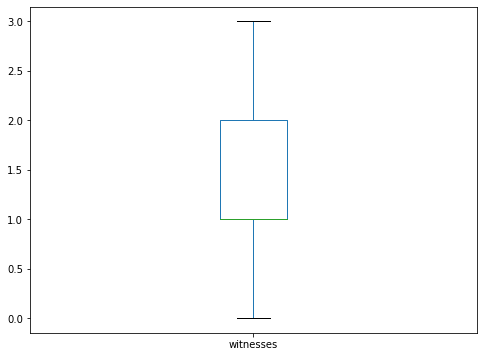

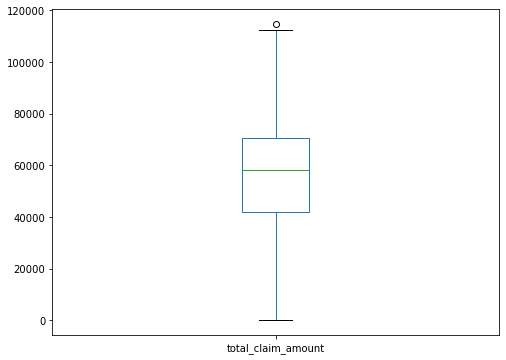

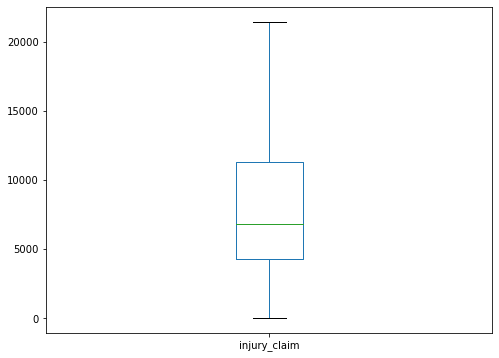

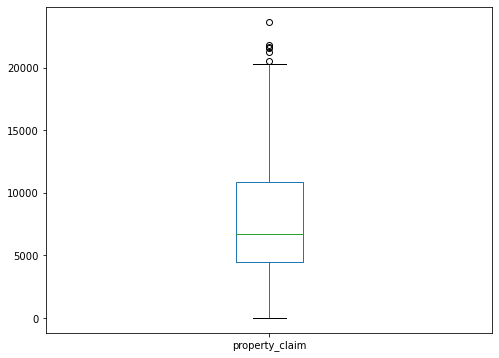

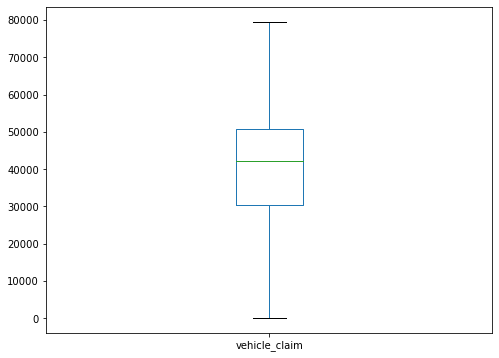

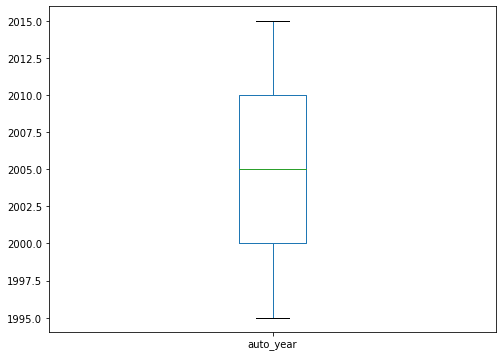

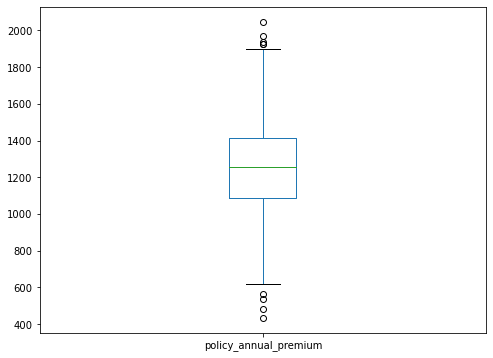

In [34]:
#box plot for outliers check
for i in cont_cols:
    plt.figure(figsize = (8, 6))
    df[i].plot.box()

No significant outliers present in dataset

In [35]:
df[cont_cols].skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_annual_premium          0.004402
dtype: float64

Dataset is not skewed

In [36]:
#to convert string data type into float & int datatype respectively
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder = LabelEncoder()
for col in cate_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [38]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,1,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,0,6500,1300,650,4550,0,31,2009,0


# Variable splitting & check Best Random State

In [39]:
from sklearn.linear_model import LogisticRegression            
from sklearn.tree import DecisionTreeClassifier                 
from sklearn.ensemble import RandomForestClassifier             
from sklearn.svm import SVC                                     
from sklearn.model_selection import train_test_split            
from sklearn.metrics import accuracy_score                      
from sklearn.metrics import roc_auc_score                       
from sklearn.metrics import confusion_matrix, classification_report      
from sklearn.model_selection import cross_val_score

In [40]:
x = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [41]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.81 on Random State 16


# Creating Train Test Split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 16)

In [43]:
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
models = [LR, DTC, svc, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))

LogisticRegression()
0.81
[[242   0]
 [ 57   1]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       242
           1       1.00      0.02      0.03        58

    accuracy                           0.81       300
   macro avg       0.90      0.51      0.46       300
weighted avg       0.85      0.81      0.73       300

DecisionTreeClassifier()
0.7833333333333333
[[202  40]
 [ 25  33]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       242
           1       0.45      0.57      0.50        58

    accuracy                           0.78       300
   macro avg       0.67      0.70      0.68       300
weighted avg       0.81      0.78      0.79       300

SVC()
0.8066666666666666
[[242   0]
 [ 58   0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       242
           1       0.00      0.00      0.00        58

    accuracy      

In [44]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression()  model is : 0.751
 
Cross Validation Score for  DecisionTreeClassifier()  model is : 0.7760000000000001
 
Cross Validation Score for  SVC()  model is : 0.7529999999999999
 
Cross Validation Score for  RandomForestClassifier()  model is : 0.7620000000000001
 


Decision Tree model has the accuracy score of 0.78 and cross validation mean of 0.77, hence it is the best model

In [46]:
from sklearn.datasets import load_iris
from sklearn import tree

In [47]:
clf = tree.DecisionTreeClassifier(random_state=16)
iris = load_iris()

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

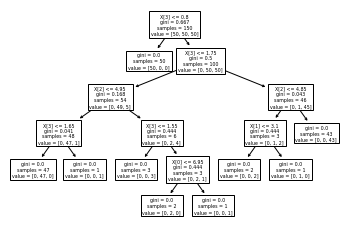

In [48]:
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

# Hypertuning

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

In [51]:
gdtc = GridSearchCV(estimator= DTC, param_grid=param_grid, cv= 3)
gdtc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [52]:
gdtc.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [53]:
gdtc1 = DecisionTreeClassifier(random_state = 373, max_depth = 3, criterion = 'gini')
gdtc1.fit(x_train, y_train)
predgdtc1 = gdtc1.predict(x_test)
print (accuracy_score(y_test, predgdtc1))
print (confusion_matrix(y_test, predgdtc1))
print (classification_report(y_test, predgdtc1))

0.8533333333333334
[[210  32]
 [ 12  46]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       242
           1       0.59      0.79      0.68        58

    accuracy                           0.85       300
   macro avg       0.77      0.83      0.79       300
weighted avg       0.88      0.85      0.86       300



In [54]:
cvs = cross_val_score(gdtc1, x, y, cv = 5)
print ('Cross Validation Score for ',gdtc1, ' model is :', cvs.mean())

Cross Validation Score for  DecisionTreeClassifier(max_depth=3, random_state=373)  model is : 0.859


After hypertuning with gridsearchcv our decision tree model's accuracy and cross val scores increased from 0.77 to 0.85 and 0.79 to 0.86 respectively

# Model Saving

In [55]:
import pickle

In [56]:
filename = 'Insurancegdtc.pkl'
pickle.dump(gdtc1, open(filename, 'wb'))

In [57]:
loaded_model = pickle.load(open('Insurancegdtc.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.8533333333333334


# Conclusion

In [58]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], predgdtc1[:]], index = ['Predicted', 'Original'])

In [59]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Predicted,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
Original,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


Model gives maximum accuracy